In [1]:
import splitfolders
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D,Flatten,Activation
from tensorflow.keras import regularizers

In [2]:
#input_folder = 'image_data/'
#splitfolders.ratio(input_folder,output="image_dataset",seed=42,ratio=(.7, .2, .1),group_prefix=None)

In [3]:
img=cv2.imread("image_dataset/train/colon_aca/colonca1.jpeg")
img.shape

(768, 768, 3)

In [4]:
train_directory = 'image_dataset/train'
test_directory = 'image_dataset/test'
val_directory = 'image_dataset/val'

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=100,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=100,
    class_mode='binary',
    shuffle=True,
    seed=42
   
    
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_directory,
target_size=(224,224), 
color_mode='rgb', 
batch_size=100, 
class_mode='binary',    
shuffle=False
)

Found 7000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(4,4))

model.add(Flatten())

model.add(Dense(32, kernel_regularizer=regularizers.l2(l2=0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = model.fit(train_generator,
                    steps_per_epoch=10,
                    epochs=30,
                    callbacks=[rlrop],          
                    validation_data=validation_generator,
                    validation_steps=3)          

Epoch 1/30
10/10 [==============================] - 69s 7s/step - loss: 0.7577 - accuracy: 0.5110 - val_loss: 0.7439 - val_accuracy: 0.5033 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - 45s 4s/step - loss: 0.7415 - accuracy: 0.5310 - val_loss: 0.7360 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - 45s 4s/step - loss: 0.7317 - accuracy: 0.5510 - val_loss: 0.7295 - val_accuracy: 0.4833 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - 42s 4s/step - loss: 0.7236 - accuracy: 0.5570 - val_loss: 0.6996 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 5/30
10/10 [==============================] - 42s 4s/step - loss: 0.6843 - accuracy: 0.7110 - val_loss: 0.6945 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 6/30
10/10 [==============================] - 44s 4s/step - loss: 0.6937 - accuracy: 0.5870 - val_loss: 0.6649 - val_accuracy: 0.6167 - lr: 0.0010
Epoch 7/30
10/10 [==============================] - 49s 5s/step - loss: 0.6711 - a

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

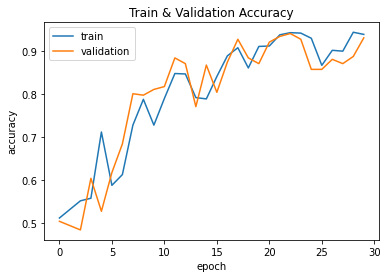

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train & Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

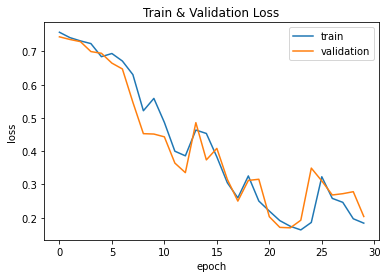

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train & Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [10]:
model.evaluate(test_generator)

10/10 [==============================] - 18s 2s/step - loss: 0.1678 - accuracy: 0.9380


[0.16776907444000244, 0.9380000233650208]

              precision    recall  f1-score   support

   colon_aca       0.50      1.00      0.67       500
     colon_n       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



C:\Users\88015\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\88015\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\88015\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


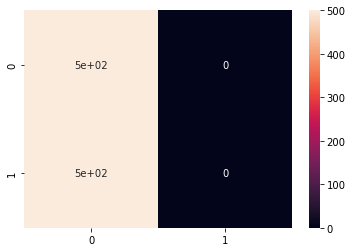

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

pred = model.predict(test_generator)
pred_classes = [np.argmax(element) for element in pred]
true_classes = test_generator.classes
sns.heatmap(confusion_matrix(true_classes,pred_classes), annot = True)


class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, pred_classes, target_names = class_labels)
print(report)